# Recognizing handwritten digits using neural network

**Importing libraries**

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Loading dataset from tensorflow**

In [2]:
mnist = tf.keras.datasets.mnist

**Spliting the dataset into training and testing set**

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

**Normalizing the inputs**

In [4]:
train_x = tf.keras.utils.normalize(train_x, axis=1)
test_x = tf.keras.utils.normalize(test_x, axis=1)

**Creating a sequential neural network of three layer**

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Specify input shape here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

**Compiling the Neural Network**

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

**Checking the structure of our neural network**

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

**Training the neural network**

In [8]:
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.4931
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1165
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0804
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0562
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0448
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0285
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0212
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0194
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0132


**Calculating the loss** *(less the loss more accurate our model is)*

In [9]:
loss = model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1172


In [10]:
loss

0.10143466293811798

**Testing the model with out own input**

In [11]:
image = cv2.imread('two.png')[:, :, 0]

In [12]:
image = np.invert(np.array([image]))

In [13]:
prediction = np.argmax(model.predict(image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [14]:
prediction

2

**Actual image passed to the neural network**

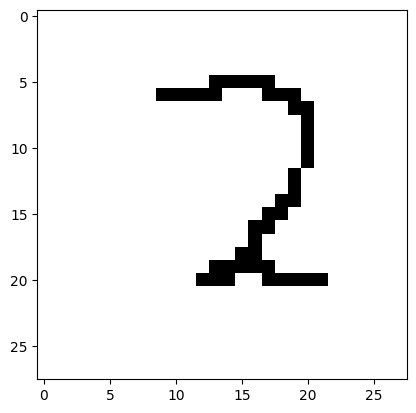

In [15]:
plt.imshow(image[0], cmap=plt.cm.binary)
plt.show()

**Trying another example**

In [16]:
image1 = cv2.imread('three.png')[:, :, 0]

In [17]:
image1 = np.invert(np.array([image1]))

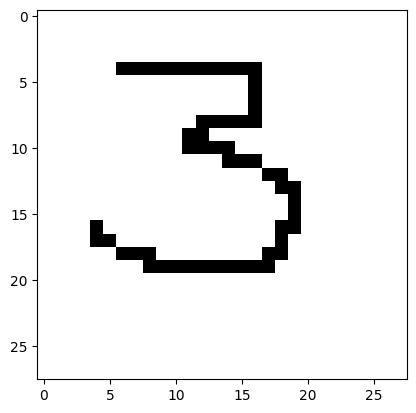

In [18]:
plt.imshow(image1[0], cmap=plt.cm.binary)
plt.show()

**Now predicting**

In [ ]:
prediction2 = model.predict(image)